In [2]:
from pycocotools.coco import COCO
import json

# COCO JSON 파일 경로
json_path = "/content/drive/MyDrive/Colab Notebooks/data/recycling/train.json"

# COCO 객체 생성
coco = COCO(json_path)

# 기본 정보 출력
print(f"이미지 수: {len(coco.getImgIds())}")
print(f"어노테이션 수: {len(coco.getAnnIds())}")
print(f"카테고리 수: {len(coco.getCatIds())}")
print(f"카테고리 이름: {coco.loadCats(coco.getCatIds())}")

loading annotations into memory...
Done (t=0.65s)
creating index...
index created!
이미지 수: 4883
어노테이션 수: 23144
카테고리 수: 10
카테고리 이름: [{'id': 0, 'name': 'General trash', 'supercategory': 'General trash'}, {'id': 1, 'name': 'Paper', 'supercategory': 'Paper'}, {'id': 2, 'name': 'Paper pack', 'supercategory': 'Paper pack'}, {'id': 3, 'name': 'Metal', 'supercategory': 'Metal'}, {'id': 4, 'name': 'Glass', 'supercategory': 'Glass'}, {'id': 5, 'name': 'Plastic', 'supercategory': 'Plastic'}, {'id': 6, 'name': 'Styrofoam', 'supercategory': 'Styrofoam'}, {'id': 7, 'name': 'Plastic bag', 'supercategory': 'Plastic bag'}, {'id': 8, 'name': 'Battery', 'supercategory': 'Battery'}, {'id': 9, 'name': 'Clothing', 'supercategory': 'Clothing'}]


# 클래스별 객체 수 계산

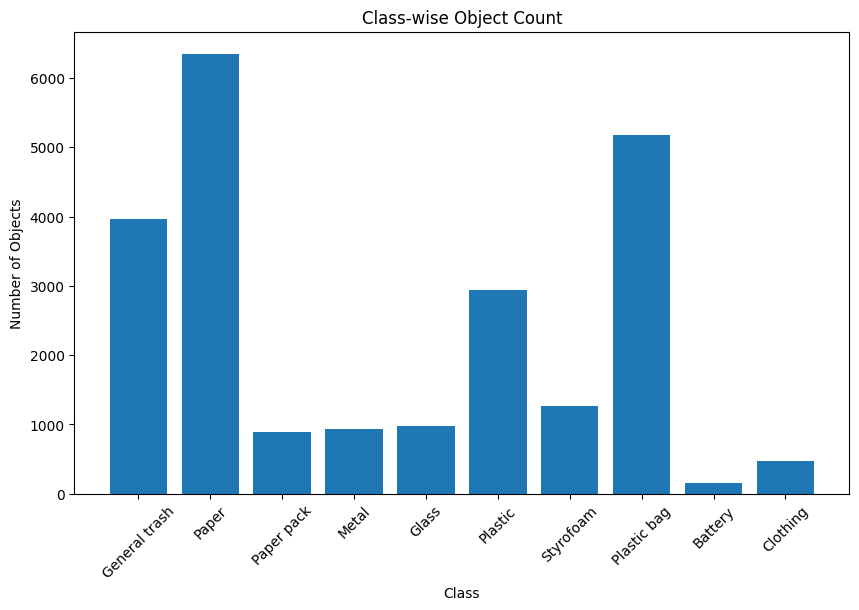

In [4]:
import matplotlib.pyplot as plt

# 클래스별 객체 수 계산
cat_ids = coco.getCatIds()
cat_names = [cat["name"] for cat in coco.loadCats(cat_ids)]
obj_counts = [len(coco.getAnnIds(catIds=[cat_id])) for cat_id in cat_ids]

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(cat_names, obj_counts)
plt.xticks(rotation=45)
plt.xlabel("Class")
plt.ylabel("Number of Objects")
plt.title("Class-wise Object Count")
plt.show()

# 클래스별 바운딩 박스 면적 분포

loading annotations into memory...
Done (t=0.09s)
creating index...
index created!


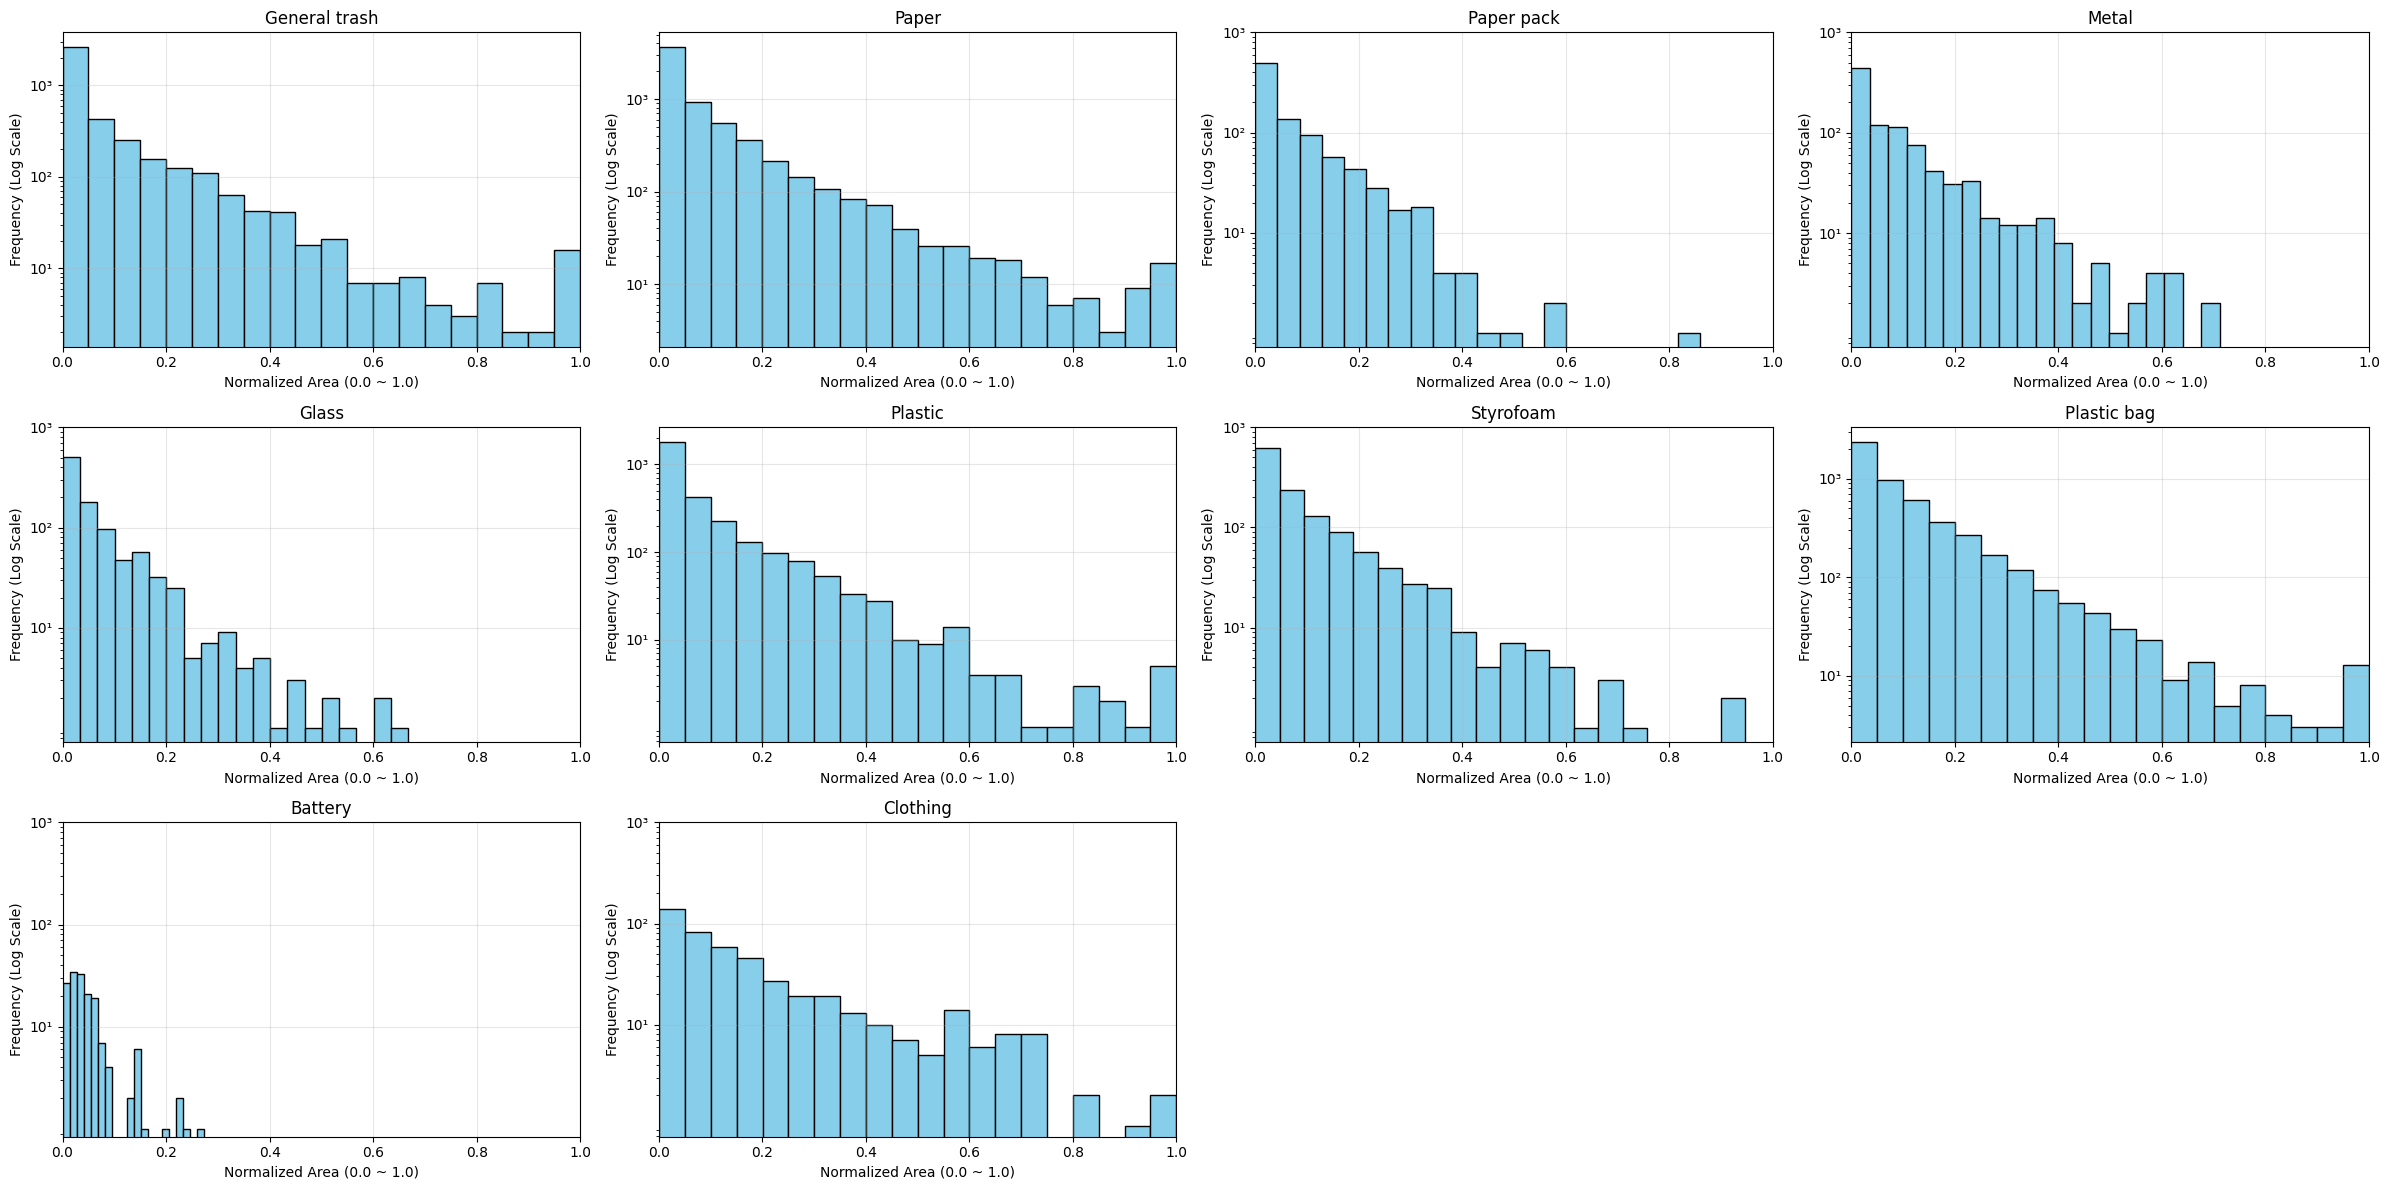

Maximum Area (before normalization): 1048371.21


In [9]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import numpy as np

# COCO JSON 파일 경로
json_path = "/content/drive/MyDrive/Colab Notebooks/data/recycling/train.json"

# COCO 객체 생성
coco = COCO(json_path)

# 클래스 ID와 이름 매핑
cat_ids = coco.getCatIds()
cat_names = [cat["name"] for cat in coco.loadCats(cat_ids)]
cat_id_to_name = {cat["id"]: cat["name"] for cat in coco.loadCats(cat_ids)}

# 클래스별 바운딩 박스 면적 저장
area_by_class = {cat_id: [] for cat_id in cat_ids}

# 모든 어노테이션 로드
ann_ids = coco.getAnnIds()
anns = coco.loadAnns(ann_ids)

# 면적 계산 및 클래스별 그룹화
all_areas = []  # 전체 면적을 저장해서 최대값 계산에 사용
for ann in anns:
    width = ann["bbox"][2]
    height = ann["bbox"][3]
    area = width * height
    cat_id = ann["category_id"]
    area_by_class[cat_id].append(area)
    all_areas.append(area)

# 전체 면적의 최대값으로 정규화
max_area = max(all_areas) if all_areas else 1.0  # 데이터가 없으면 1.0으로 설정

# 클래스별 면적 정규화
for cat_id in cat_ids:
    area_by_class[cat_id] = [area / max_area for area in area_by_class[cat_id]]

# 클래스 수에 따라 서브플롯 크기 조정
n_classes = len(cat_ids)
n_cols = 4  # 열 수를 4로 설정
n_rows = (n_classes + n_cols - 1) // n_cols  # 행 수 계산

# 서브플롯으로 시각화 (막대 수 줄임, 가로 길이 늘림)
plt.figure(figsize=(24, 4 * n_rows))  # 가로 크기를 24로 늘림
for i, cat_id in enumerate(cat_ids, 1):
    areas = area_by_class[cat_id]
    if areas:  # 데이터가 있는 경우만 플롯
        plt.subplot(n_rows, n_cols, i)
        plt.hist(areas, bins=20, color='skyblue', edgecolor='black')  # bins를 20으로 줄임
        plt.yscale('log')  # y축을 로그 스케일로 설정
        plt.yticks([10, 100, 1000], ['10¹', '10²', '10³'])  # y축 값 지정
        plt.xlim(0.0, 1.0)  # x축 범위를 0.0 ~ 1.0으로 제한
        plt.title(f"{cat_id_to_name[cat_id]}")
        plt.xlabel("Normalized Area (0.0 ~ 1.0)")
        plt.ylabel("Frequency (Log Scale)")
        plt.grid(True, alpha=0.3)  # 그리드 추가
plt.tight_layout()
plt.show()

# 최대 면적 값 출력 (참고용)
print(f"Maximum Area (before normalization): {max_area}")

# 클래스 불균형 확인

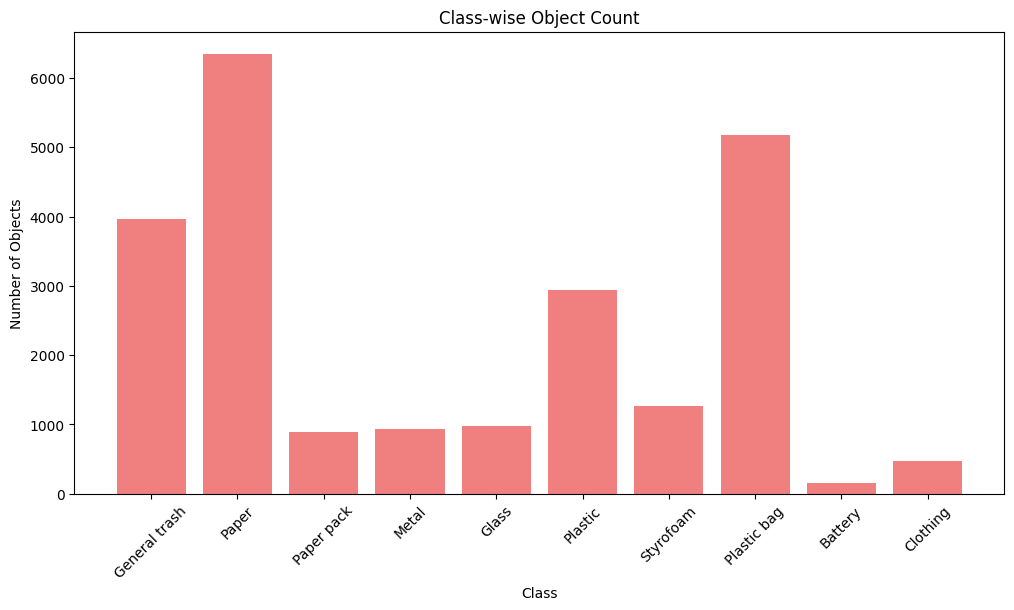

In [10]:
obj_counts = [len(area_by_class[cat_id]) for cat_id in cat_ids]
plt.figure(figsize=(12, 6))
plt.bar(cat_names, obj_counts, color='lightcoral')
plt.xticks(rotation=45)
plt.xlabel("Class")
plt.ylabel("Number of Objects")
plt.title("Class-wise Object Count")
plt.show()

# 바운딩 박스 크기 비율

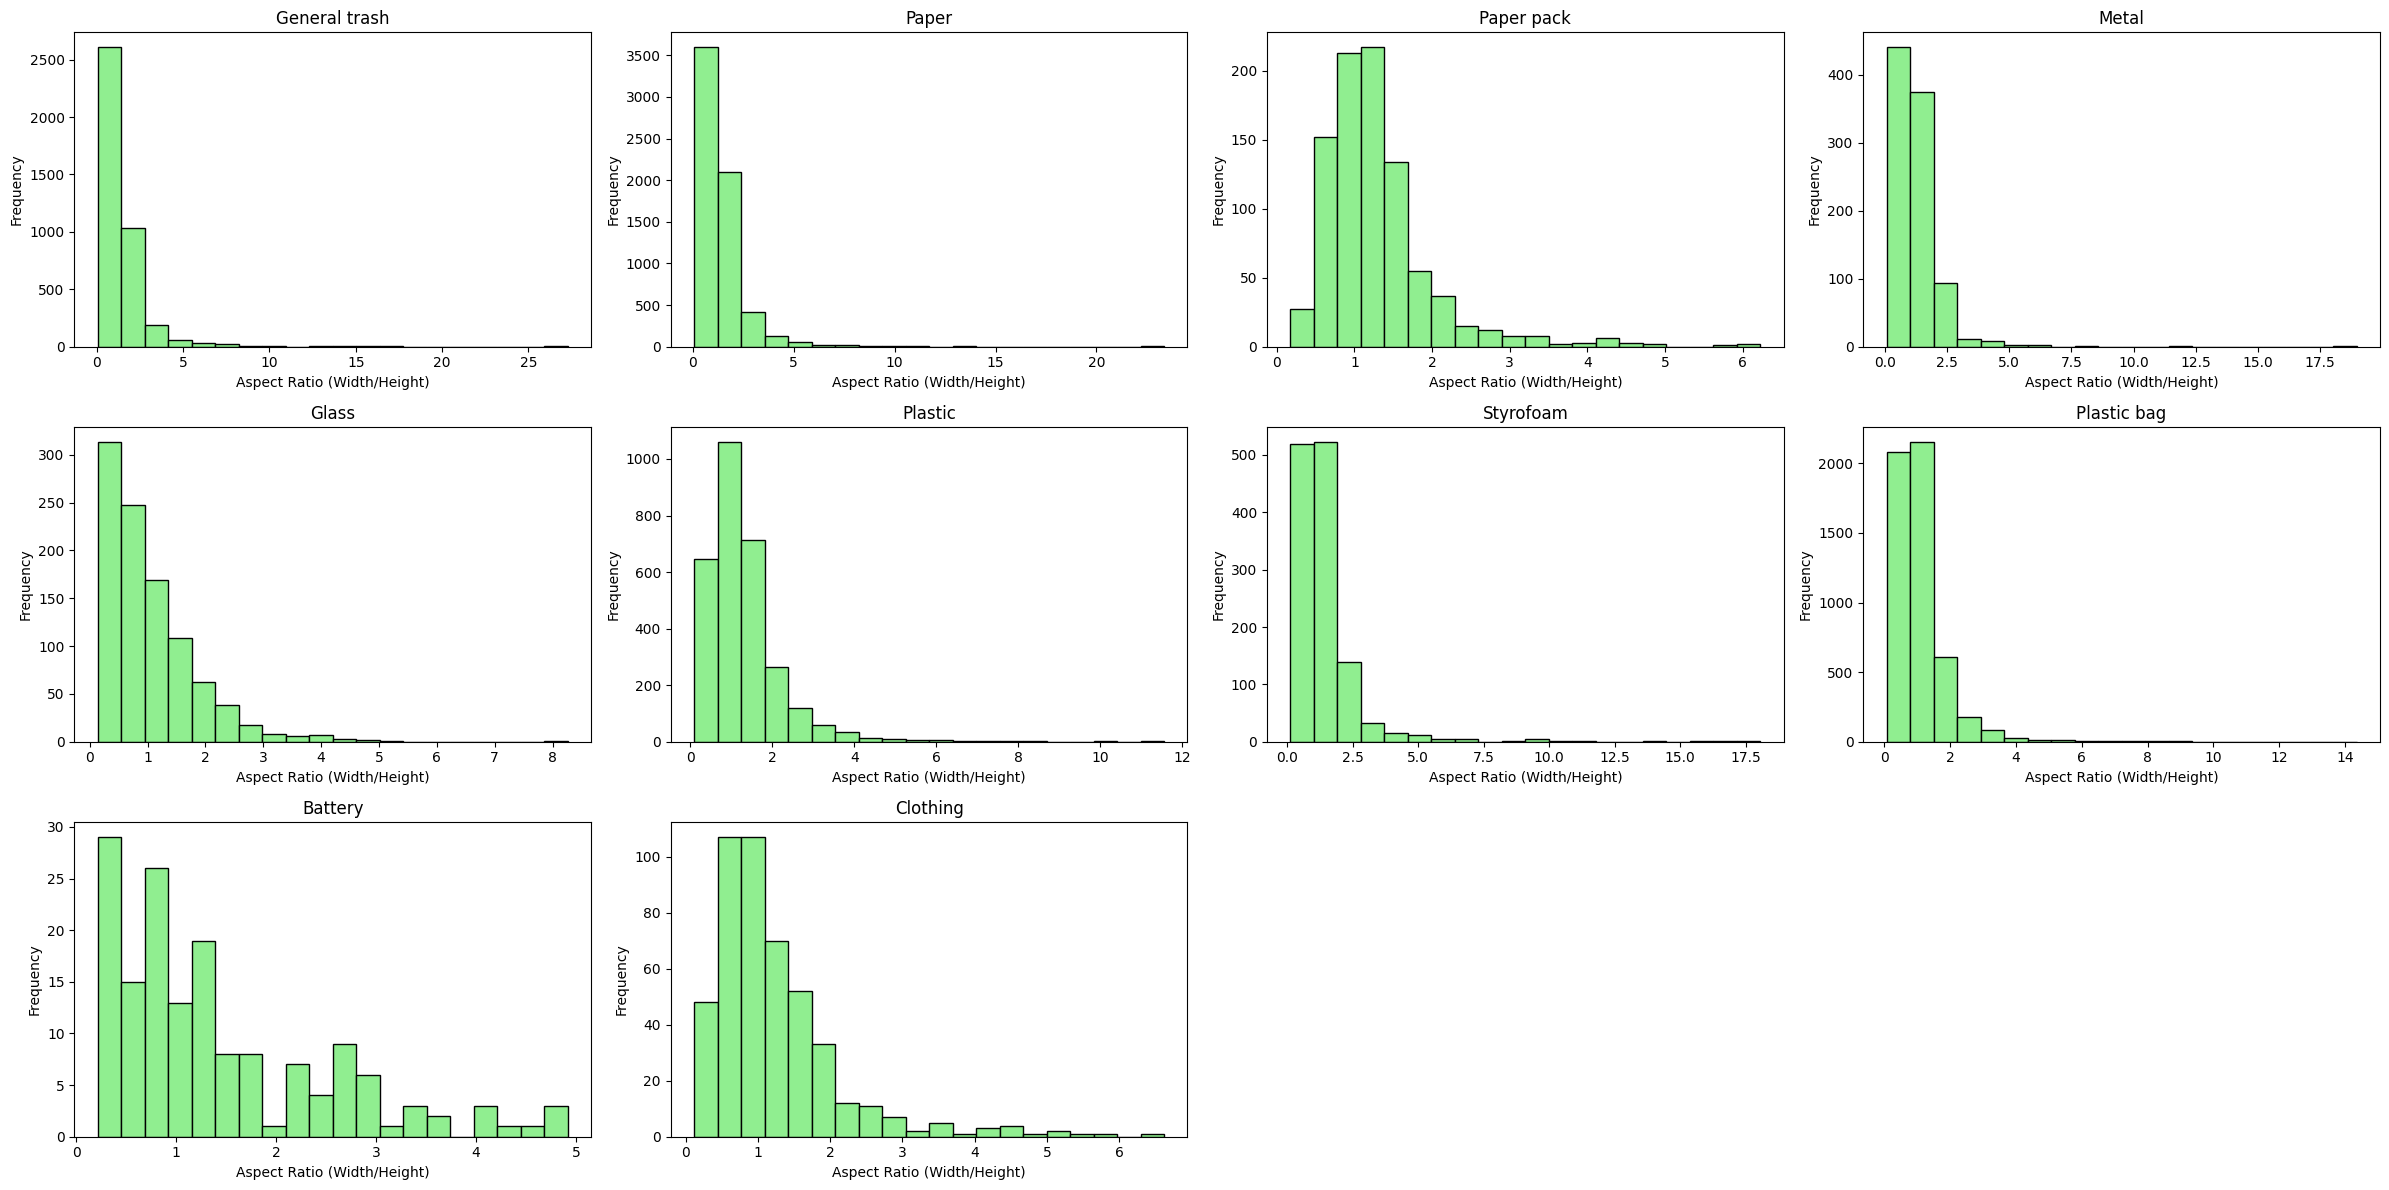

In [11]:
aspect_ratios_by_class = {cat_id: [] for cat_id in cat_ids}
for ann in anns:
    width = ann["bbox"][2]
    height = ann["bbox"][3]
    aspect_ratio = width / height if height > 0 else 0
    aspect_ratios_by_class[ann["category_id"]].append(aspect_ratio)

plt.figure(figsize=(24, 4 * n_rows))
for i, cat_id in enumerate(cat_ids, 1):
    ratios = aspect_ratios_by_class[cat_id]
    if ratios:
        plt.subplot(n_rows, n_cols, i)
        plt.hist(ratios, bins=20, color='lightgreen', edgecolor='black')
        plt.title(f"{cat_id_to_name[cat_id]}")
        plt.xlabel("Aspect Ratio (Width/Height)")
        plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 너무 작은 객체 분석:
# 면적이 특정 임계값(예: 0.01 이하)인 객체를 클래스별로 카운트.

In [16]:
small_obj_threshold = 0.01  # 정규화된 면적 기준
small_objs_by_class = {cat_id: 0 for cat_id in cat_ids}
for cat_id in cat_ids:
    small_objs_by_class[cat_id] = sum(1 for area in area_by_class[cat_id] if area < small_obj_threshold)
print("Small Objects by Class:", small_objs_by_class)

Small Objects by Class: {0: 1543, 1: 1691, 2: 235, 3: 265, 4: 192, 5: 890, 6: 196, 7: 889, 8: 19, 9: 30}


# 바운딩 박스 위치 분포

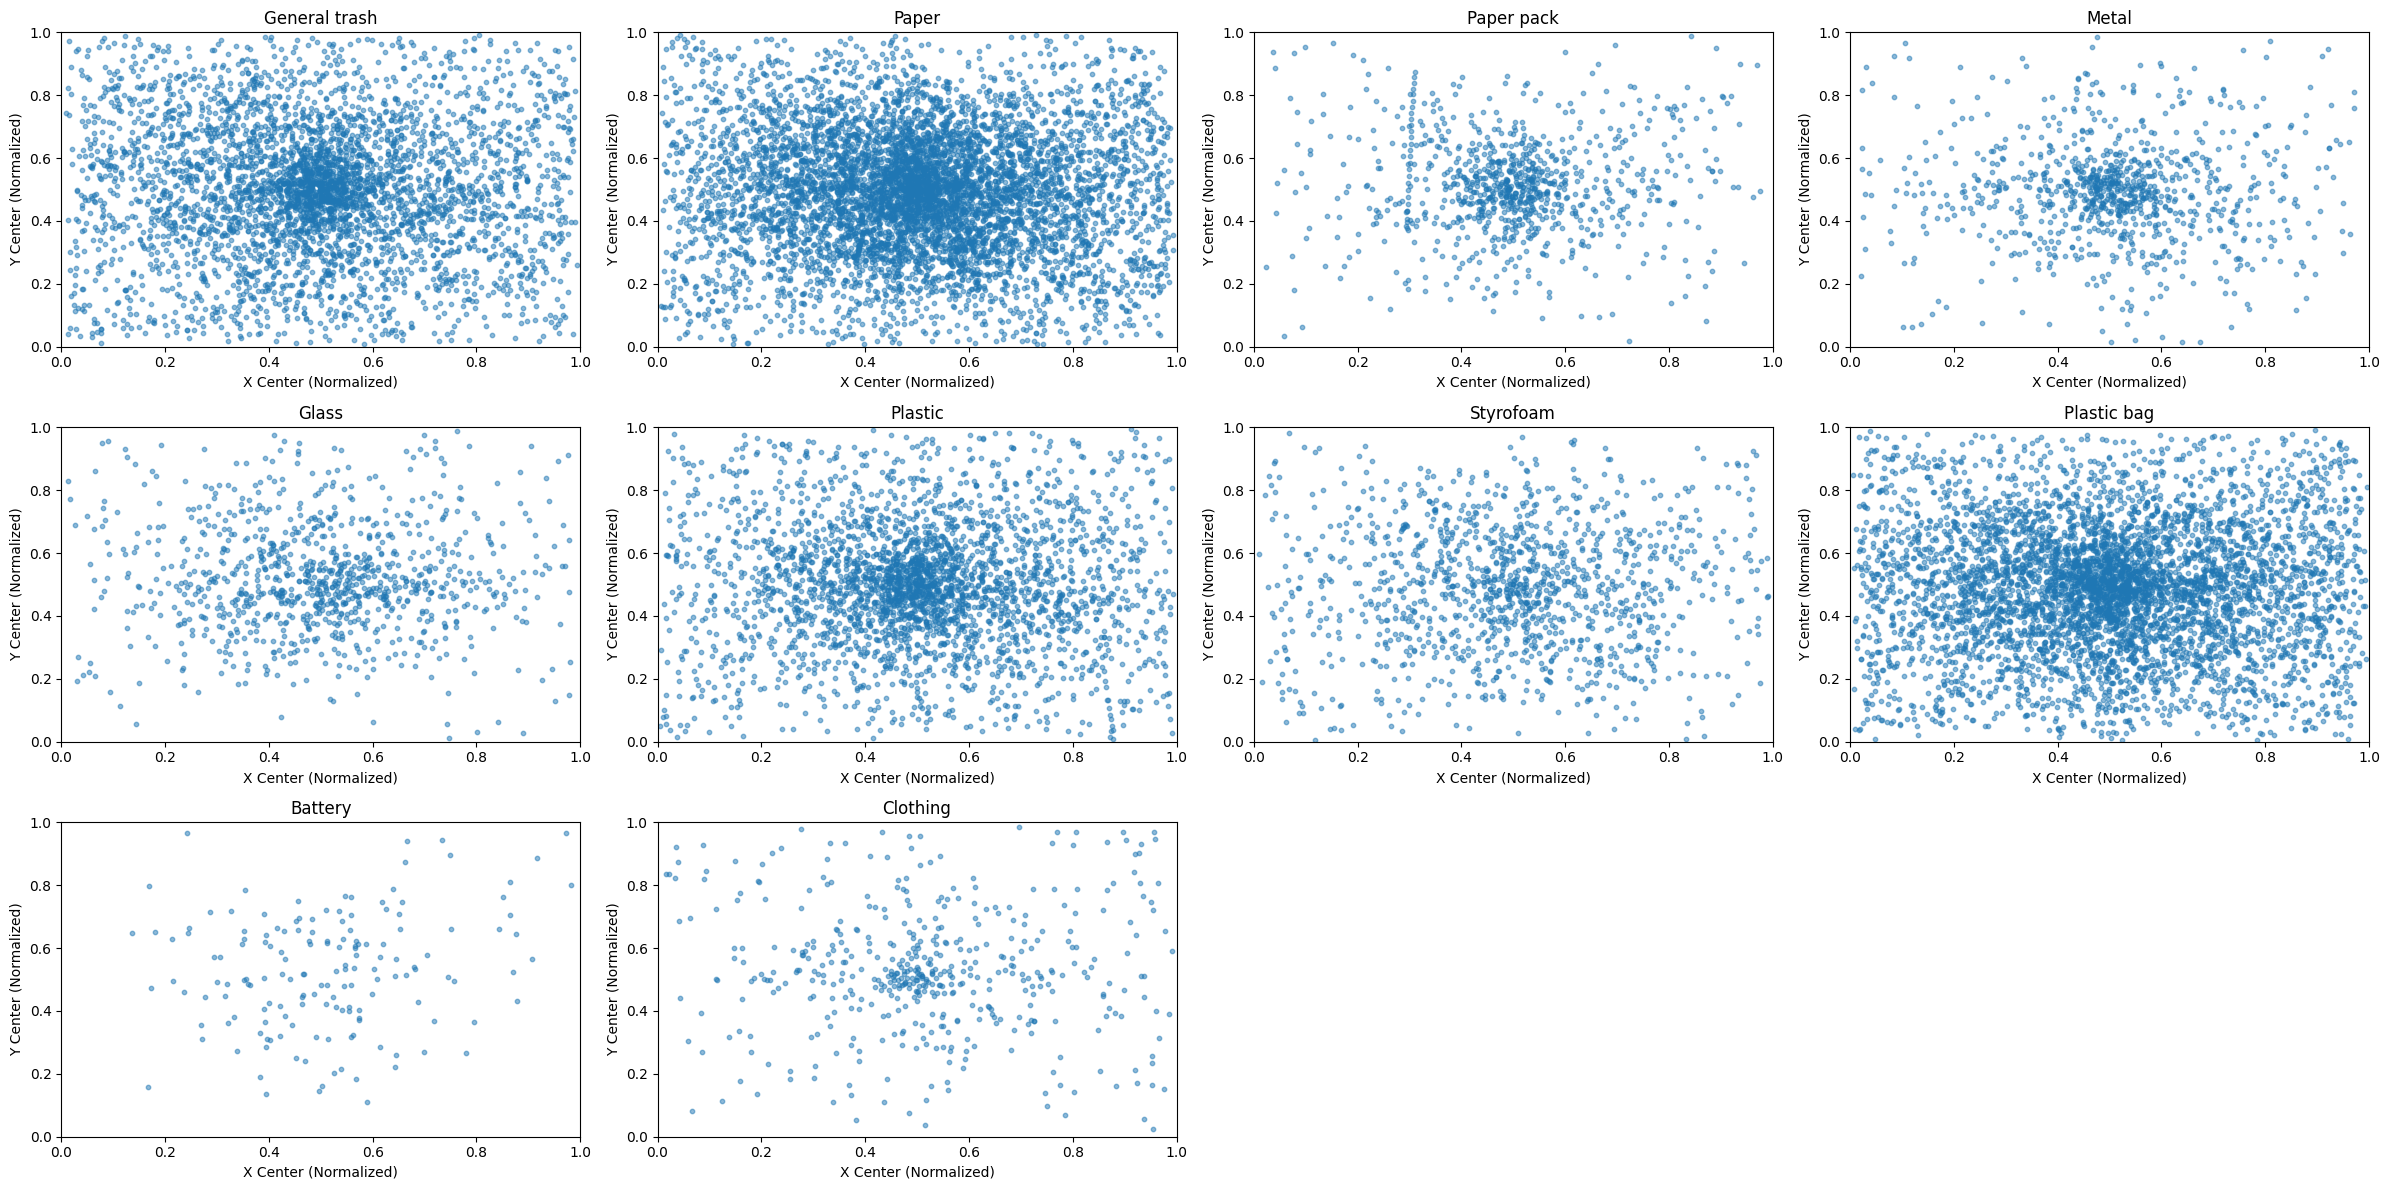

In [17]:
plt.figure(figsize=(24, 4 * n_rows))
for i, cat_id in enumerate(cat_ids, 1):
    x_centers, y_centers = [], []
    for ann in coco.getAnnIds(catIds=[cat_id]):
        ann_data = coco.loadAnns(ann)[0]
        img = coco.loadImgs(ann_data["image_id"])[0]
        w, h = img["width"], img["height"]
        x, y, bw, bh = ann_data["bbox"]
        x_center = (x + bw / 2) / w
        y_center = (y + bh / 2) / h
        x_centers.append(x_center)
        y_centers.append(y_center)
    if x_centers:
        plt.subplot(n_rows, n_cols, i)
        plt.scatter(x_centers, y_centers, alpha=0.5, s=10)
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        plt.title(f"{cat_id_to_name[cat_id]}")
        plt.xlabel("X Center (Normalized)")
        plt.ylabel("Y Center (Normalized)")
plt.tight_layout()
plt.show()